# Section 1 : Submitters

**Submitters:
Yael Avraham,ID : 206656589 ,
Eden Fabrikant, ID: 212302541**


Kaggle link:
https://www.kaggle.com/yaelavraham

# Section 2 : Overview

**House Prices Advanced Regression Techniques Competition - Project Overview**

In this Kaggle competition, we aim to predict the final sale price of homes located in Ames, Iowa, based on a diverse set of features.

As some people may put an emphasis on the number of rooms in the house, neighborhood or even the age of the house as the main predictor of the home price, we try to give more accurate predictions (SalePrice column) with many more features. In this competition we explore this feature with a given Dataset and utilize it for our model - minimizing the RMSE metric.

We will use a **LWLR, KNN and Decision tree model** to perform this prediction. Our workflow includes data exploration, processing of the data, statistical analyses, training the model, and evaluating its performance.  

# Section 3 : Imports and Definitions

In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import log_loss, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
import plotly.graph_objects as go
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from joblib import Parallel, delayed
from sklearn.utils import shuffle

# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

# Section 4 : Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Path to the new folder inside my google drive
folder_path = '/content/drive/My Drive/titanic ML'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Section 5 : Data Investigation and Preprocessing

In [ ]:
#uploading the data
train_path = '/content/drive/My Drive/Ames ML/train.csv'
test_path = '/content/drive/My Drive/Ames ML/test.csv'

train_df = pd.read_csv(train_path)
train_df_f = pd.read_csv(train_path)
test_df_f = pd.read_csv(test_path)

In [ ]:
#display
print("Train display:")
display(train_df)
print("Test display:")
display(test_df_f)

Train display:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Test display:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Unique value count

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

unique_counts = train_df.nunique().sort_values(ascending=False).head(20)
display(unique_counts.to_frame(name='Unique Values'))

,Unique Values
Id,1460
LotArea,1073
GrLivArea,861
BsmtUnfSF,780
1stFlrSF,753
TotalBsmtSF,721
SalePrice,663
BsmtFinSF1,637
GarageArea,441
2ndFlrSF,417


We will keep in mind that LotArea, GrLivArea, BsmtUnfSF, 1stFlrSF, TotalBsmtSF (and Id of cource) will cause overfitting.

Searching for missing data

In [ ]:
# Show only the columns that actually have NaNs
train_df.isna().sum()[train_df.isna().sum() > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
# Percentege
missing_percent = train_df.isnull().mean() * 100

# Top 20 with most missing values
top_missing = missing_percent.sort_values(ascending=False).head(20)

# Table
top_missing_df = top_missing.reset_index()
top_missing_df.columns = ['Feature', 'MissingPercentage']

display(top_missing_df)


,Feature,MissingPercentage
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,MasVnrType,59.726027
5,FireplaceQu,47.260274
6,LotFrontage,17.739726
7,GarageQual,5.547945
8,GarageFinish,5.547945
9,GarageType,5.547945



PoolQC, MiscFeature, Alley, Fence, MasVnrType and FireplaceQu have a significant amount of missing values, we will probably drop these columns.
As for LotFrontage we will have to check it's affect on the model.
For the rest of the columns we will probably drop only the rows that contain null values.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#dropping id
train_df = train_df.drop(columns=['Id'])

# Section 6 : Data Visualization & conclusions

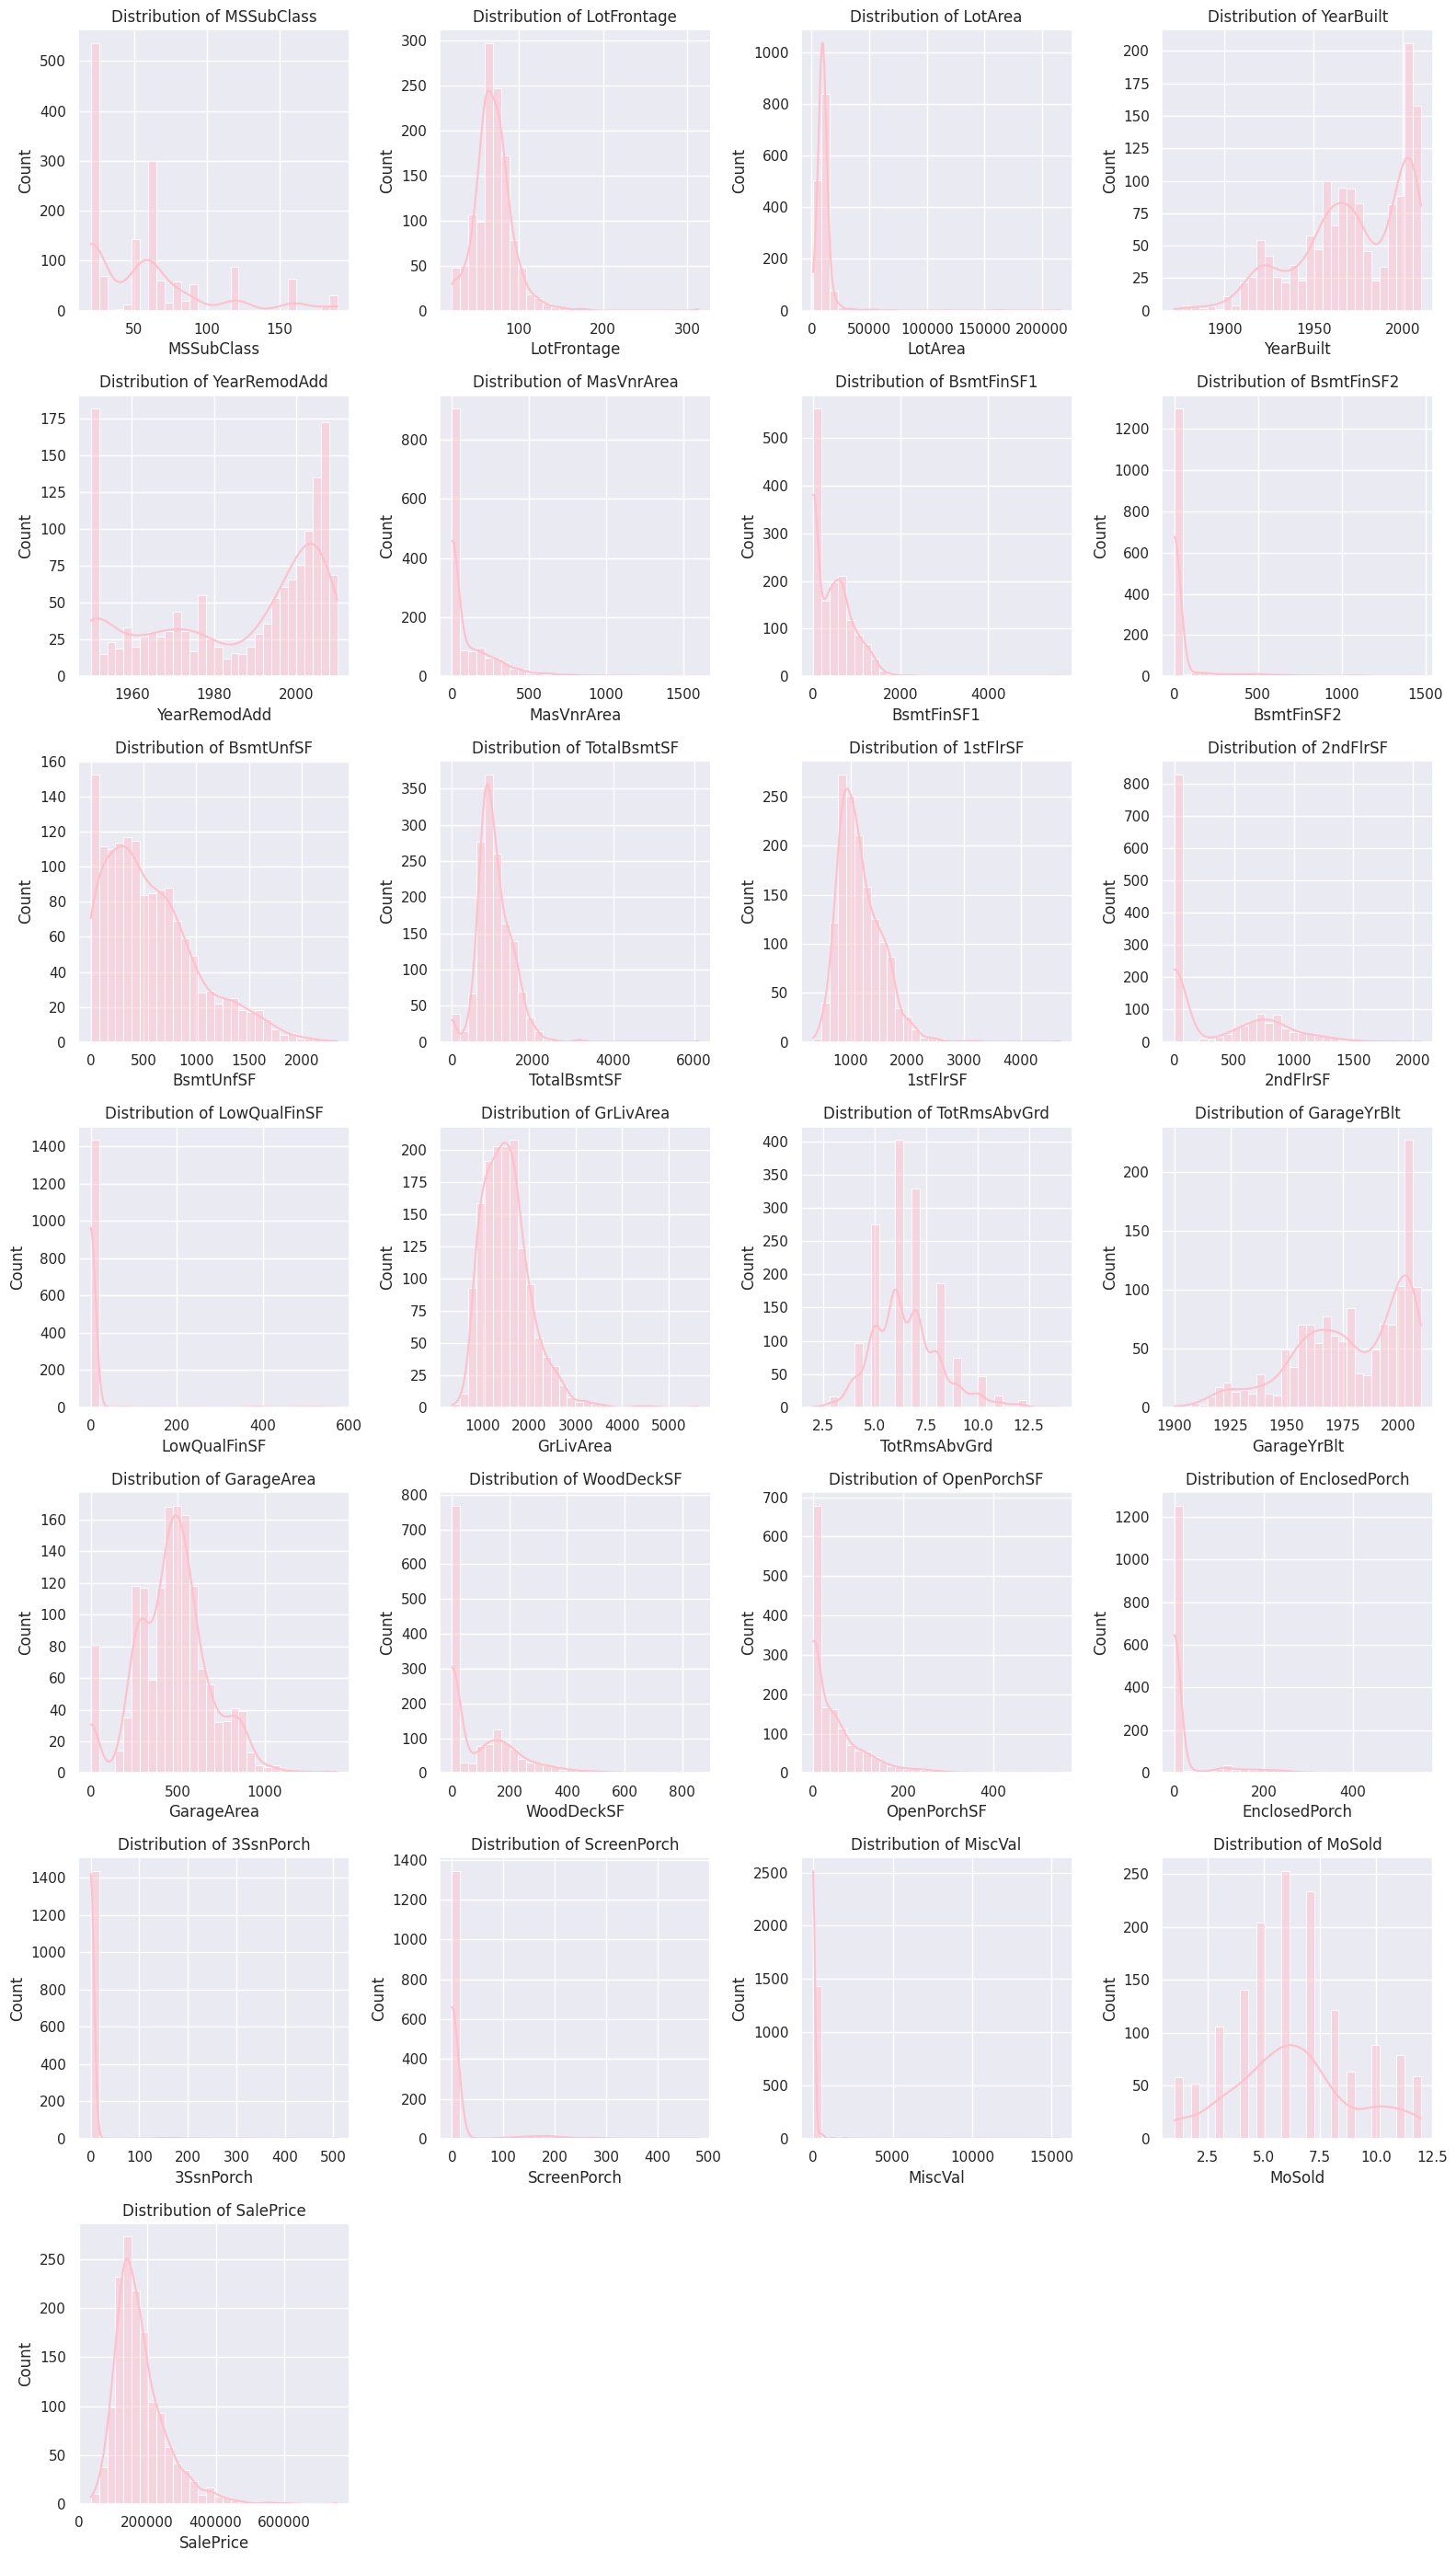

In [ ]:
#Histograms for numerical features

sns.set_theme()
df = train_df.copy()

ncols = 4
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

for col in numerical_cols.copy():
    if df[col].nunique() <= 10:
        categorical_cols.append(col)
        numerical_cols.remove(col)

nrows = (len(numerical_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='pink')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Many features such as LotArea, GrLivArea, TotalBsmtSF, and MiscVal show strong right skewness, with a large concentration of small values and a few large outliers.
Since KNN and LWLR, which are sensitive to feature scale and distance, it is important to apply log or standardization to these features.

Irrelevant Features:
MiscVal is mostly zero and may not contribute significantly to predictions.

LotArea, GrLivArea, BsmtFinSF1 contain strong outliers.
For KNN/LWLR, which rely on distance metrics, these outliers can distort results.

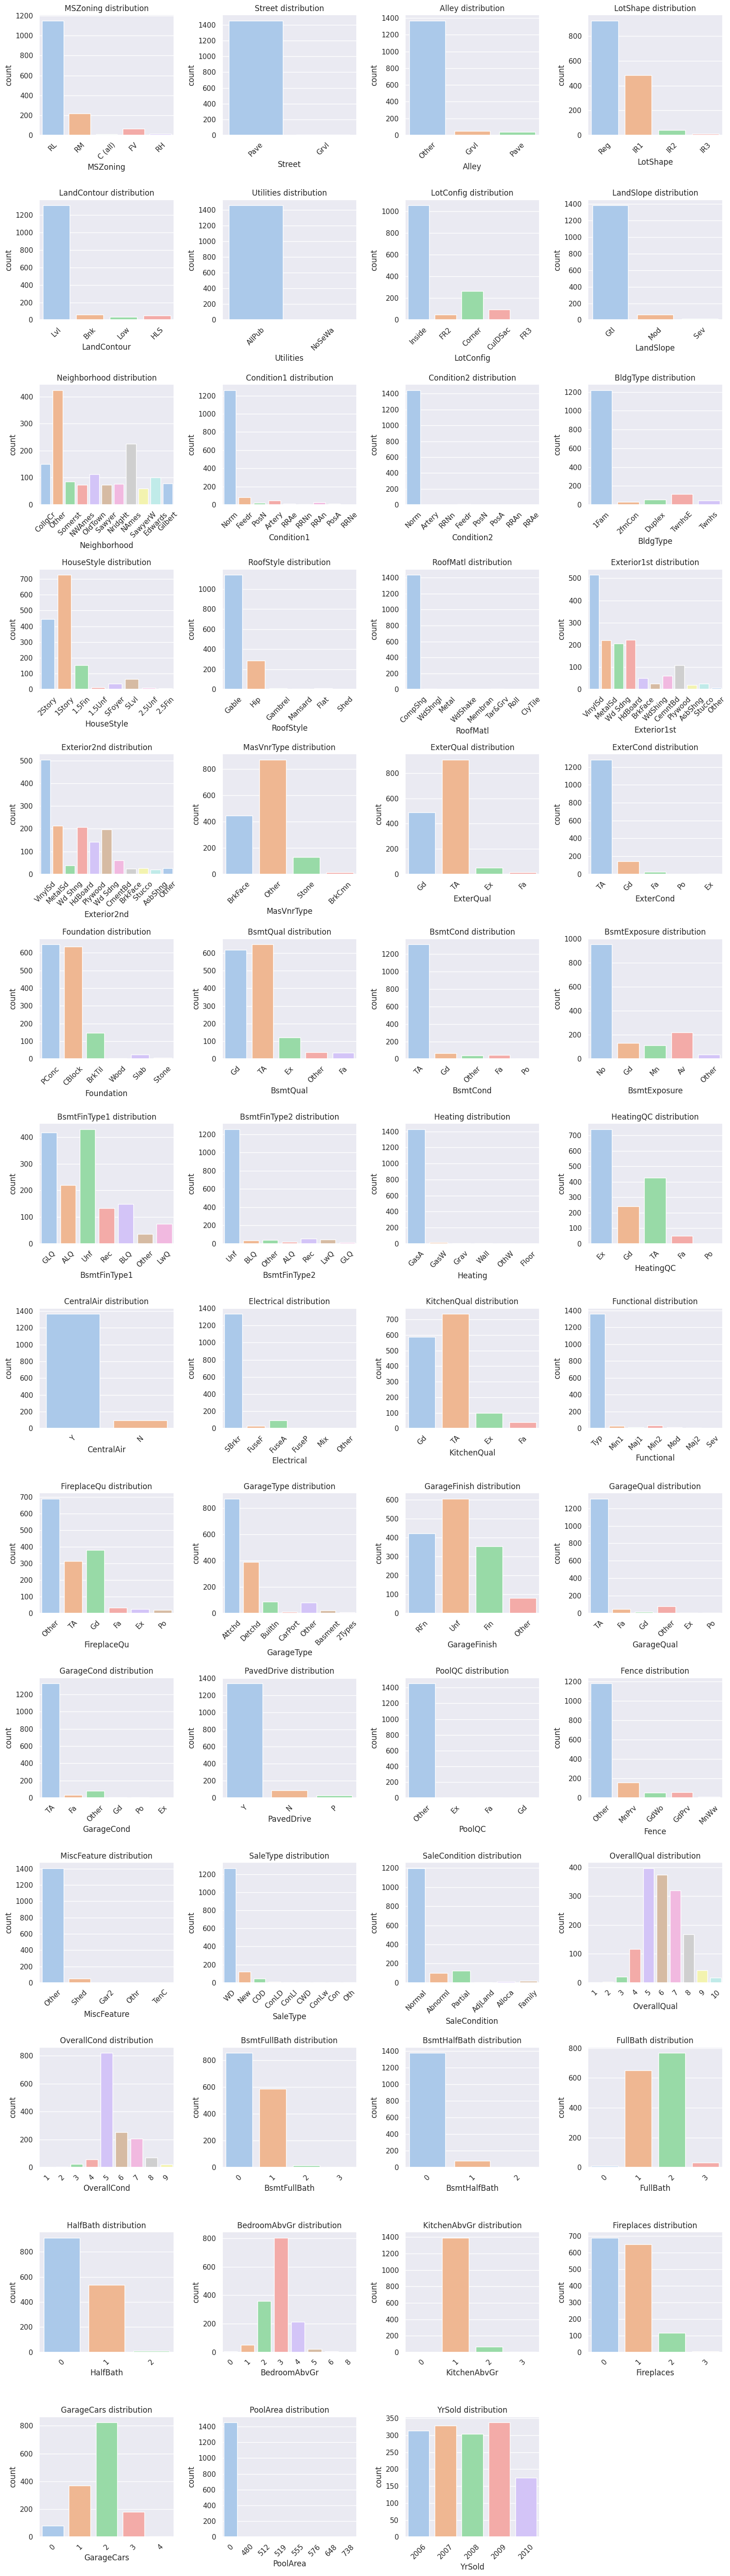

In [ ]:
#barplots for categorical features

nrows = (len(categorical_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_categories = df[col].value_counts().nlargest(10).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'{col} distribution', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Many features such as Street, Utilities, Condition2, RoofMatl, Heating, PoolQC, MiscFeature, and Alley are heavily imbalanced, with one category representing the vast majority of the values.

These features provide little to no predictive value. They can be dropped.

Features like MSZoning, Neighborhood, HouseStyle, ExterQual, and GarageFinish show more varied distributions across multiple categories.
These are likely informative and should be included in the modeling process.
PoolArea, ScreenPorch, MiscVal and 3SsnPorch might also be harmful for the model.

We will display the correlation between each column and the true value ( 'SalePrice' ) with a heatmap

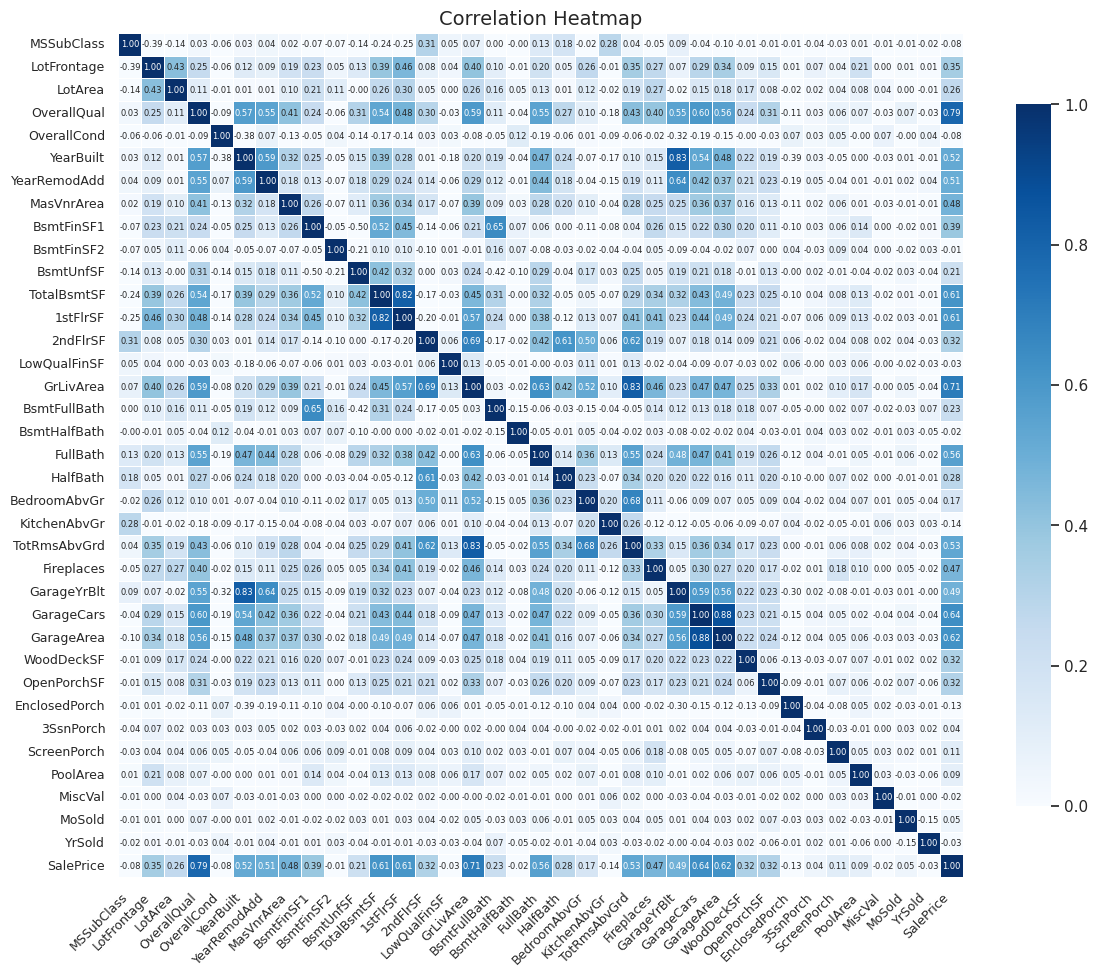

In [ ]:
# Keep only numeric columns before computing correlation
cor = train_df.select_dtypes(include=['number']).corr()

# Slightly smaller heatmap size
plt.figure(figsize=(12, 10))
sns.heatmap(cor,
            cmap='Blues',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 6},
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8},
            vmin=0, vmax=1)

plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()


insights:
Strongest Positive Correlations with SalePrice are
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd.

Weak or Irrelevant Features:
Features like MSSubClass, MoSold, YrSold, EnclosedPorch, 3SsnPorch, MiscVal, and PoolArea show very low correlation with SalePrice, meaning they may contribute little to prediction and can be considered for removal.


# Section 7 : Data processing

מסקנה 1

In [ ]:
#dropping irrelevant features due to very high percentage of nulls
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage'])

#dropping rows with null values
train_df = train_df.dropna()

In [ ]:
# Function to evaluate the model using K-Fold CV
def evaluate_model_with_kfold(model, df, target_column='SalePrice', k=5):

    # Split to training and validation sets
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]
    X_val = val_df.drop(columns=[target_column])
    y_val = val_df[target_column]

    # Identify feature types
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

    # Define column transformer
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Transform data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)

    # K-Fold CV
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_transformed):
        X_fold_train = X_train_transformed[train_idx]
        y_fold_train = y_train.iloc[train_idx]
        X_fold_test = X_train_transformed[test_idx]
        y_fold_test = y_train.iloc[test_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_test)
        rmse = np.sqrt(mean_squared_error(y_fold_test, y_pred))
        rmse_scores.append(rmse)

    # Final model evaluation on validation set
    model.fit(X_train_transformed, y_train)
    y_val_pred = model.predict(X_val_transformed)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Return rounded results as regular floats
    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
from sklearn.compose import ColumnTransformer
from joblib import Parallel, delayed

#LWLR Prediction Function
def lwlr(test_point, X_train, y_train, tau=0.5, reg_lambda=1e-6):
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    test_point_bias = np.r_[1, test_point]
    m, n = X_train_bias.shape

    diff = X_train - test_point
    weights = np.exp(np.sum(-diff**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    XTWX = X_train_bias.T @ W @ X_train_bias
    identity_matrix = np.eye(n)
    identity_matrix[0, 0] = 0
    regularized_XTWX = XTWX + reg_lambda * identity_matrix
    XTWy = X_train_bias.T @ W @ y_train

    try:
        theta = np.linalg.solve(regularized_XTWX, XTWy)
    except np.linalg.LinAlgError:
        return np.mean(y_train)

    prediction = test_point_bias @ theta
    if np.isnan(prediction) or np.isinf(prediction):
        return np.mean(y_train)
    return prediction

def lwlr_loo(i, X_train, y_train, tau, reg_lambda):
    X_exclude = np.delete(X_train, i, axis=0)
    y_exclude = np.delete(y_train, i, axis=0)
    x_query = X_train[i]
    return lwlr(x_query, X_exclude, y_exclude, tau, reg_lambda)

def fast_holdout_lwlr(df, target_col, tau=0.5, reg_lambda=1e-6, n_jobs=-1):

    X = df.drop(columns=target_col)
    y = df[target_col]

    numerical_cols = X.select_dtypes(include=np.number).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)

    if hasattr(X_train_processed, "toarray"):
        X_train_processed = X_train_processed.toarray()
        X_val_processed = X_val_processed.toarray()

    train_preds = Parallel(n_jobs=n_jobs)(
        delayed(lwlr_loo)(i, X_train_processed, y_train.values, tau, reg_lambda)
        for i in range(X_train_processed.shape[0])
    )
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

    val_preds = Parallel(n_jobs=n_jobs)(
        delayed(lwlr)(x, X_train_processed, y_train.values, tau, reg_lambda)
        for x in X_val_processed
    )
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

    return {
        'train_rmse': round(float(train_rmse), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


We chose to use K-Fold Cross-Validation to ensure that our model is evaluated on multiple train-test splits, which helps reduce variance and gives a more reliable estimate of performance. This technique also maximizes the use of available data by allowing each observation to be used for both training and validation.

## Section 7.1 : Feature selection based on data investigation

First we will evaluate the model with the current dataframe as a baseline.

In [ ]:
train_df_1 = train_df.copy()

tree_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor()

tree_results = evaluate_model_with_kfold(tree_model, train_df_1)
knn_results = evaluate_model_with_kfold(knn_model, train_df_1)
lwlr_results = fast_holdout_lwlr(train_df_1, target_col='SalePrice', tau=0.5)

print("Decision Tree Results:")
print(tree_results)

print("\nKNN Regressor Results:")
print(knn_results)

print("\nLWLR Regressor Results:")
print(lwlr_results)


Decision Tree Results:
{'mean_train_rmse': 47970.23, 'val_rmse': 35317.45}

KNN Regressor Results:
{'mean_train_rmse': 40538.9, 'val_rmse': 28116.91}

LWLR Regressor Results:
{'train_rmse': 49027.16, 'val_rmse': 34211.16}


We will drop the features that were concluded to be suspected to cause overfitting, noise, and very low correlation to 'SalepPrice'.
PoolArea, ScreenPorch, LotArea, BsmtUnfSF, MiscVal, MoSold, YrSold, EnclosedPorch, 3SsnPorch, LowQualFinSF

In [ ]:
train_df_2 = train_df.copy()

columns_to_drop = [
    'PoolArea', 'ScreenPorch', 'LotArea', 'BsmtUnfSF', 'MiscVal',
    'MoSold', 'YrSold', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'Id'
]
train_df_2.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
tree_results = evaluate_model_with_kfold(tree_model, train_df_2)
knn_results = evaluate_model_with_kfold(knn_model, train_df_2)
lwlr_results = fast_holdout_lwlr(train_df_2, target_col='SalePrice', tau=0.5)

print("Decision Tree Results:")
print(tree_results)

print("\nKNN Regressor Results:")
print(knn_results)

print("\nLWLR Regressor Results:")
print(lwlr_results)


Decision Tree Results:
{'mean_train_rmse': 45770.92, 'val_rmse': 34084.39}

KNN Regressor Results:
{'mean_train_rmse': 36343.82, 'val_rmse': 27232.33}

LWLR Regressor Results:
{'train_rmse': 41587.86, 'val_rmse': 32405.98}


As expected, removing less informative features based on visual analysis, all models showed improved performance, with lower RMSE values on both training and validation sets. The KNN Regressor achieved the best validation RMSE, indicating strong generalization ability.

## Section 7.2 : PCA

We will use PCA to reduce the dimensions and we will check how it affects the model.

In [ ]:
train_df_3 = train_df.copy()
target_col = 'SalePrice'

X = train_df_3.drop(columns=[target_col])
y = train_df_3[target_col]


numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_processed)


print(f"Original number of features: {X_processed.shape[1]}")
print(f"Number of PCA components to explain 95% variance: {X_pca.shape[1]}")



Original number of features: 72
Number of PCA components to explain 95% variance: 39


In [ ]:

def evaluate_model_from_encoded_data(model, X, y, k=5, test_size=0.2, random_state=42):

    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_full):
        X_train, X_test = X_train_full[train_idx], X_train_full[test_idx]
        y_train, y_test = y_train_full[train_idx], y_train_full[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    model.fit(X_train_full, y_train_full)
    y_val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_lwlr_with_kfold(X, y, lwlr_func, tau=0.5, reg_lambda=1e-6, k=5, test_size=0.2, random_state=42):

    X_train_full, X_val, y_train_full, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_train_full):
        X_train, X_test = X_train_full[train_idx], X_train_full[test_idx]
        y_train, y_test = y_train_full[train_idx], y_train_full[test_idx]

        y_pred = np.array([
            lwlr_func(x, X_train, y_train, tau=tau, reg_lambda=reg_lambda)
            for x in X_test
        ])
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    y_val_pred = np.array([
        lwlr_func(x, X_train_full, y_train_full, tau=tau, reg_lambda=reg_lambda)
        for x in X_val
    ])
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    return {
        'mean_train_rmse': round(float(np.mean(rmse_scores)), 2),
        'val_rmse': round(float(val_rmse), 2)
    }


In [ ]:
result1=evaluate_model_from_encoded_data(tree_model, X_pca, y.values)
print(result1)
result2=evaluate_model_from_encoded_data(knn_model, X_pca, y.values)
print(result2)
result3=evaluate_lwlr_with_kfold(X_pca, y.values, lwlr)
print(result3)

{'mean_train_rmse': 49246.44, 'val_rmse': 42489.67}
{'mean_train_rmse': 43594.19, 'val_rmse': 31680.01}
{'mean_train_rmse': 50788.17, 'val_rmse': 43060.07}


Conclusions:
Applying PCA reduced the dimensionality of the dataset, but resulted in a noticeable decline in predictive performance across all models. This suggests that the original cleaned dataset preserved important feature relationships that were lost in the PCA transformation. Therefore, in this case, PCA did not improve generalization and is not recommended over the original selected features.



# Section 8 : Hyperparameter Tuning - Model Tuned Performance

We will perform hyperparameter tuning using the dataset prepared based on feature investigation and visualization, as it previously yielded the best predictive results.

In [ ]:
מסקנה 2

In [ ]:
train_df_filtered = train_df.copy()

columns_to_drop = [
    'PoolArea', 'ScreenPorch', 'LotArea', 'BsmtUnfSF', 'MiscVal',
    'MoSold', 'YrSold', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'Id'
]
train_df_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# שלב 1: פיצול ונרמול + קידוד
X = train_df_filtered.drop(columns=["SalePrice"])
y = train_df_filtered["SalePrice"]

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# זיהוי סוגי עמודות
numeric_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_raw.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# טרנספורמציה: נרמול מספרים, קידוד ordinal לקטגוריות
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
])

# טרנספורמציה בפועל
X_train = preprocessor.fit_transform(X_train_raw)
X_val = preprocessor.transform(X_val_raw)


# שלב 2: פונקציית LWLR מהירה
def lwlr_predict_fast(X_train, y_train, X_query, tau):
    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_query_bias = np.hstack((np.ones((X_query.shape[0], 1)), X_query))
    y_pred = []

    for x in X_query_bias:
        diff = X_train_bias - x
        weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau ** 2))
        W = np.diag(weights)
        try:
            theta = np.linalg.pinv(X_train_bias.T @ W @ X_train_bias) @ X_train_bias.T @ W @ y_train
            y_pred.append(x @ theta)
        except np.linalg.LinAlgError:
            y_pred.append(np.mean(y_train))
    return np.array(y_pred)

def tune_lwlr(tau_list):
    best_tau = None
    best_val_rmse = float('inf')
    best_train_rmse = None

    for tau in tau_list:
        y_train_pred = lwlr_predict_fast(X_train, y_train, X_train, tau)
        y_val_pred = lwlr_predict_fast(X_train, y_train, X_val, tau)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        if val_rmse < best_val_rmse:
            best_val_rmse = val_rmse
            best_train_rmse = train_rmse
            best_tau = tau

    return best_train_rmse, best_val_rmse, {'tau': best_tau}

# שלב 3: KNN עם פרמטרים שמרניים
def tune_knn():
    param_grid = {
        'n_neighbors': range(5, 21),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    knn = KNeighborsRegressor()
    grid = GridSearchCV(knn, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    return (
        np.sqrt(mean_squared_error(y_train, best.predict(X_train))),
        np.sqrt(mean_squared_error(y_val, best.predict(X_val))),
        grid.best_params_
    )

# שלב 4: Decision Tree
def tune_tree():
    param_grid = {
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    tree = DecisionTreeRegressor(random_state=42)
    grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    return (
        np.sqrt(mean_squared_error(y_train, best.predict(X_train))),
        np.sqrt(mean_squared_error(y_val, best.predict(X_val))),
        grid.best_params_
    )

# שלב 5: הרצה של המודלים
#lwlr_train_rmse, lwlr_val_rmse, lwlr_params = tune_lwlr([0.1, 0.5, 1.0, 5.0])
knn_train_rmse, knn_val_rmse, knn_params = tune_knn()
tree_train_rmse, tree_val_rmse, tree_params = tune_tree()

# שלב 6: טבלת תוצאות
results_df = pd.DataFrame([

    {
        'Model': 'KNN',
        'Train RMSE': round(knn_train_rmse, 2),
        'Validation RMSE': round(knn_val_rmse, 2),
        'Best Params': knn_params
    },
    {
        'Model': 'Decision Tree',
        'Train RMSE': round(tree_train_rmse, 2),
        'Validation RMSE': round(tree_val_rmse, 2),
        'Best Params': tree_params
    }
])

print("📊 טבלת תוצאות:")
print(results_df)


📊 טבלת תוצאות:
           Model  Train RMSE  Validation RMSE  \
0            KNN        3.57         26567.72   
1  Decision Tree    20766.39         35024.79   

                                         Best Params  
0  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}  
1          {'max_depth': 7, 'min_samples_split': 10}  


# Section 9 : Ensembles